# Avacado Project
### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Some relevant columns in the dataset:

   - Date - The date of the observation
   - AveragePrice - the average price of a single avocado
   - type - conventional or organic
   - year - the year
   - Region - the city or region of the observation
   - Total Volume - Total number of avocados sold
   - 4046 - Total number of avocados with PLU 4046 sold
   - 4225 - Total number of avocados with PLU 4225 sold
   - 4770 - Total number of avocados with PLU 4770 sold


### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

### Task: 
   - One of Classification and 
   - other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

# Importing Libraries

In [1]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler

# To display all columns
pd.pandas.set_option('display.max_columns',None)

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Reading File

In [4]:
df = pd.read_csv('avocado.csv')

# -------------------------------Getting to Know About Data---------------------------------------

## 1. Overall Data Analysis

In [5]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (18249, 14)


In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
df.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9474,36,2015-04-19,1.52,123851.34,55948.06,57078.01,1.49,10823.78,10823.78,0.00,0.00,organic,2015,California
5889,8,2017-11-05,1.37,115630.87,9707.40,54119.19,58.11,51746.17,19894.72,31804.78,46.67,conventional,2017,BuffaloRochester
2226,42,2015-03-08,1.16,830775.42,260192.19,442834.07,31289.15,96460.01,95539.75,803.34,116.92,conventional,2015,SanFrancisco
17177,51,2017-01-08,1.10,104424.88,26212.50,6181.32,0.00,72031.06,69782.27,2248.79,0.00,organic,2017,SouthCentral
1162,18,2015-08-23,1.03,2604991.25,1687625.73,538010.14,92245.94,287109.44,279700.22,3994.61,3414.61,conventional,2015,LosAngeles
17518,21,2017-08-06,2.10,178606.86,42641.59,42953.57,315.01,92696.69,56820.93,35875.76,0.00,organic,2017,West
3979,27,2016-06-19,0.90,3237847.21,1322109.94,593238.74,114307.31,1208191.22,1102265.57,80776.26,25149.39,conventional,2016,LosAngeles
6855,20,2017-08-13,1.38,93447.51,2736.38,37308.97,121.05,53281.11,27903.99,24543.79,833.33,conventional,2017,Louisville
2204,20,2015-08-09,1.56,603876.90,158022.04,345590.21,24997.46,75267.19,74158.48,1108.71,0.00,conventional,2015,SanFrancisco
15308,37,2017-04-16,1.03,14081.94,763.69,2797.15,0.00,10521.10,2641.36,7879.74,0.00,organic,2017,Columbus


In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

### Observation - 
   - There are 18249 Number of rows and 14 columns in given Data Frame. 
   - These columns need to remove, as no information can be extracted from = Unnamed: 0.

In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
# Removing duplicate values
df.duplicated().sum()

0

In [12]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [13]:
df.drop('Date', axis=1, inplace=True)

### Observations -
- There are no duplicates in data set.
- We have converted Date column into months, to extract information based on months

## 2. Getting to Know More About Data Type

In [14]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month             int64
dtype: object

### Observation - 
- All data except region and type is Continuous
- Data data is converted into month, as we can find average price based on month and year of selling

## 3 Gettting to Know Five Number Summery for Continuous variable

In [15]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


### Observation - 
- 

In [16]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
month              12
dtype: int64

### Observation  -
- There are 259 unique average prices of Avacados
- There are two categories in feature "type"
- Year data is categorised into four types
- Region feature is divided into region
- Month is divided into month

## 5 Gettting to Know Summery for Categorical variable

In [17]:
df.describe(include='O')

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


### Observation  - 
- There are two categories in feature type, with mode of conventional having frquency of 9126.
- Feature "region" has 54 category
- From all regions, Region Albany has high count as 338. 

## 6 Getting to Know About Missing Values

In [18]:
# Feature Wise missing Values
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

In [19]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 0 missing values in dataset


### Observation -
- From results we can see that, there are no missing values in dataset

In [20]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

# --------------------------------------------------EDA------------------------------------------------------

## 1. Scatterplot

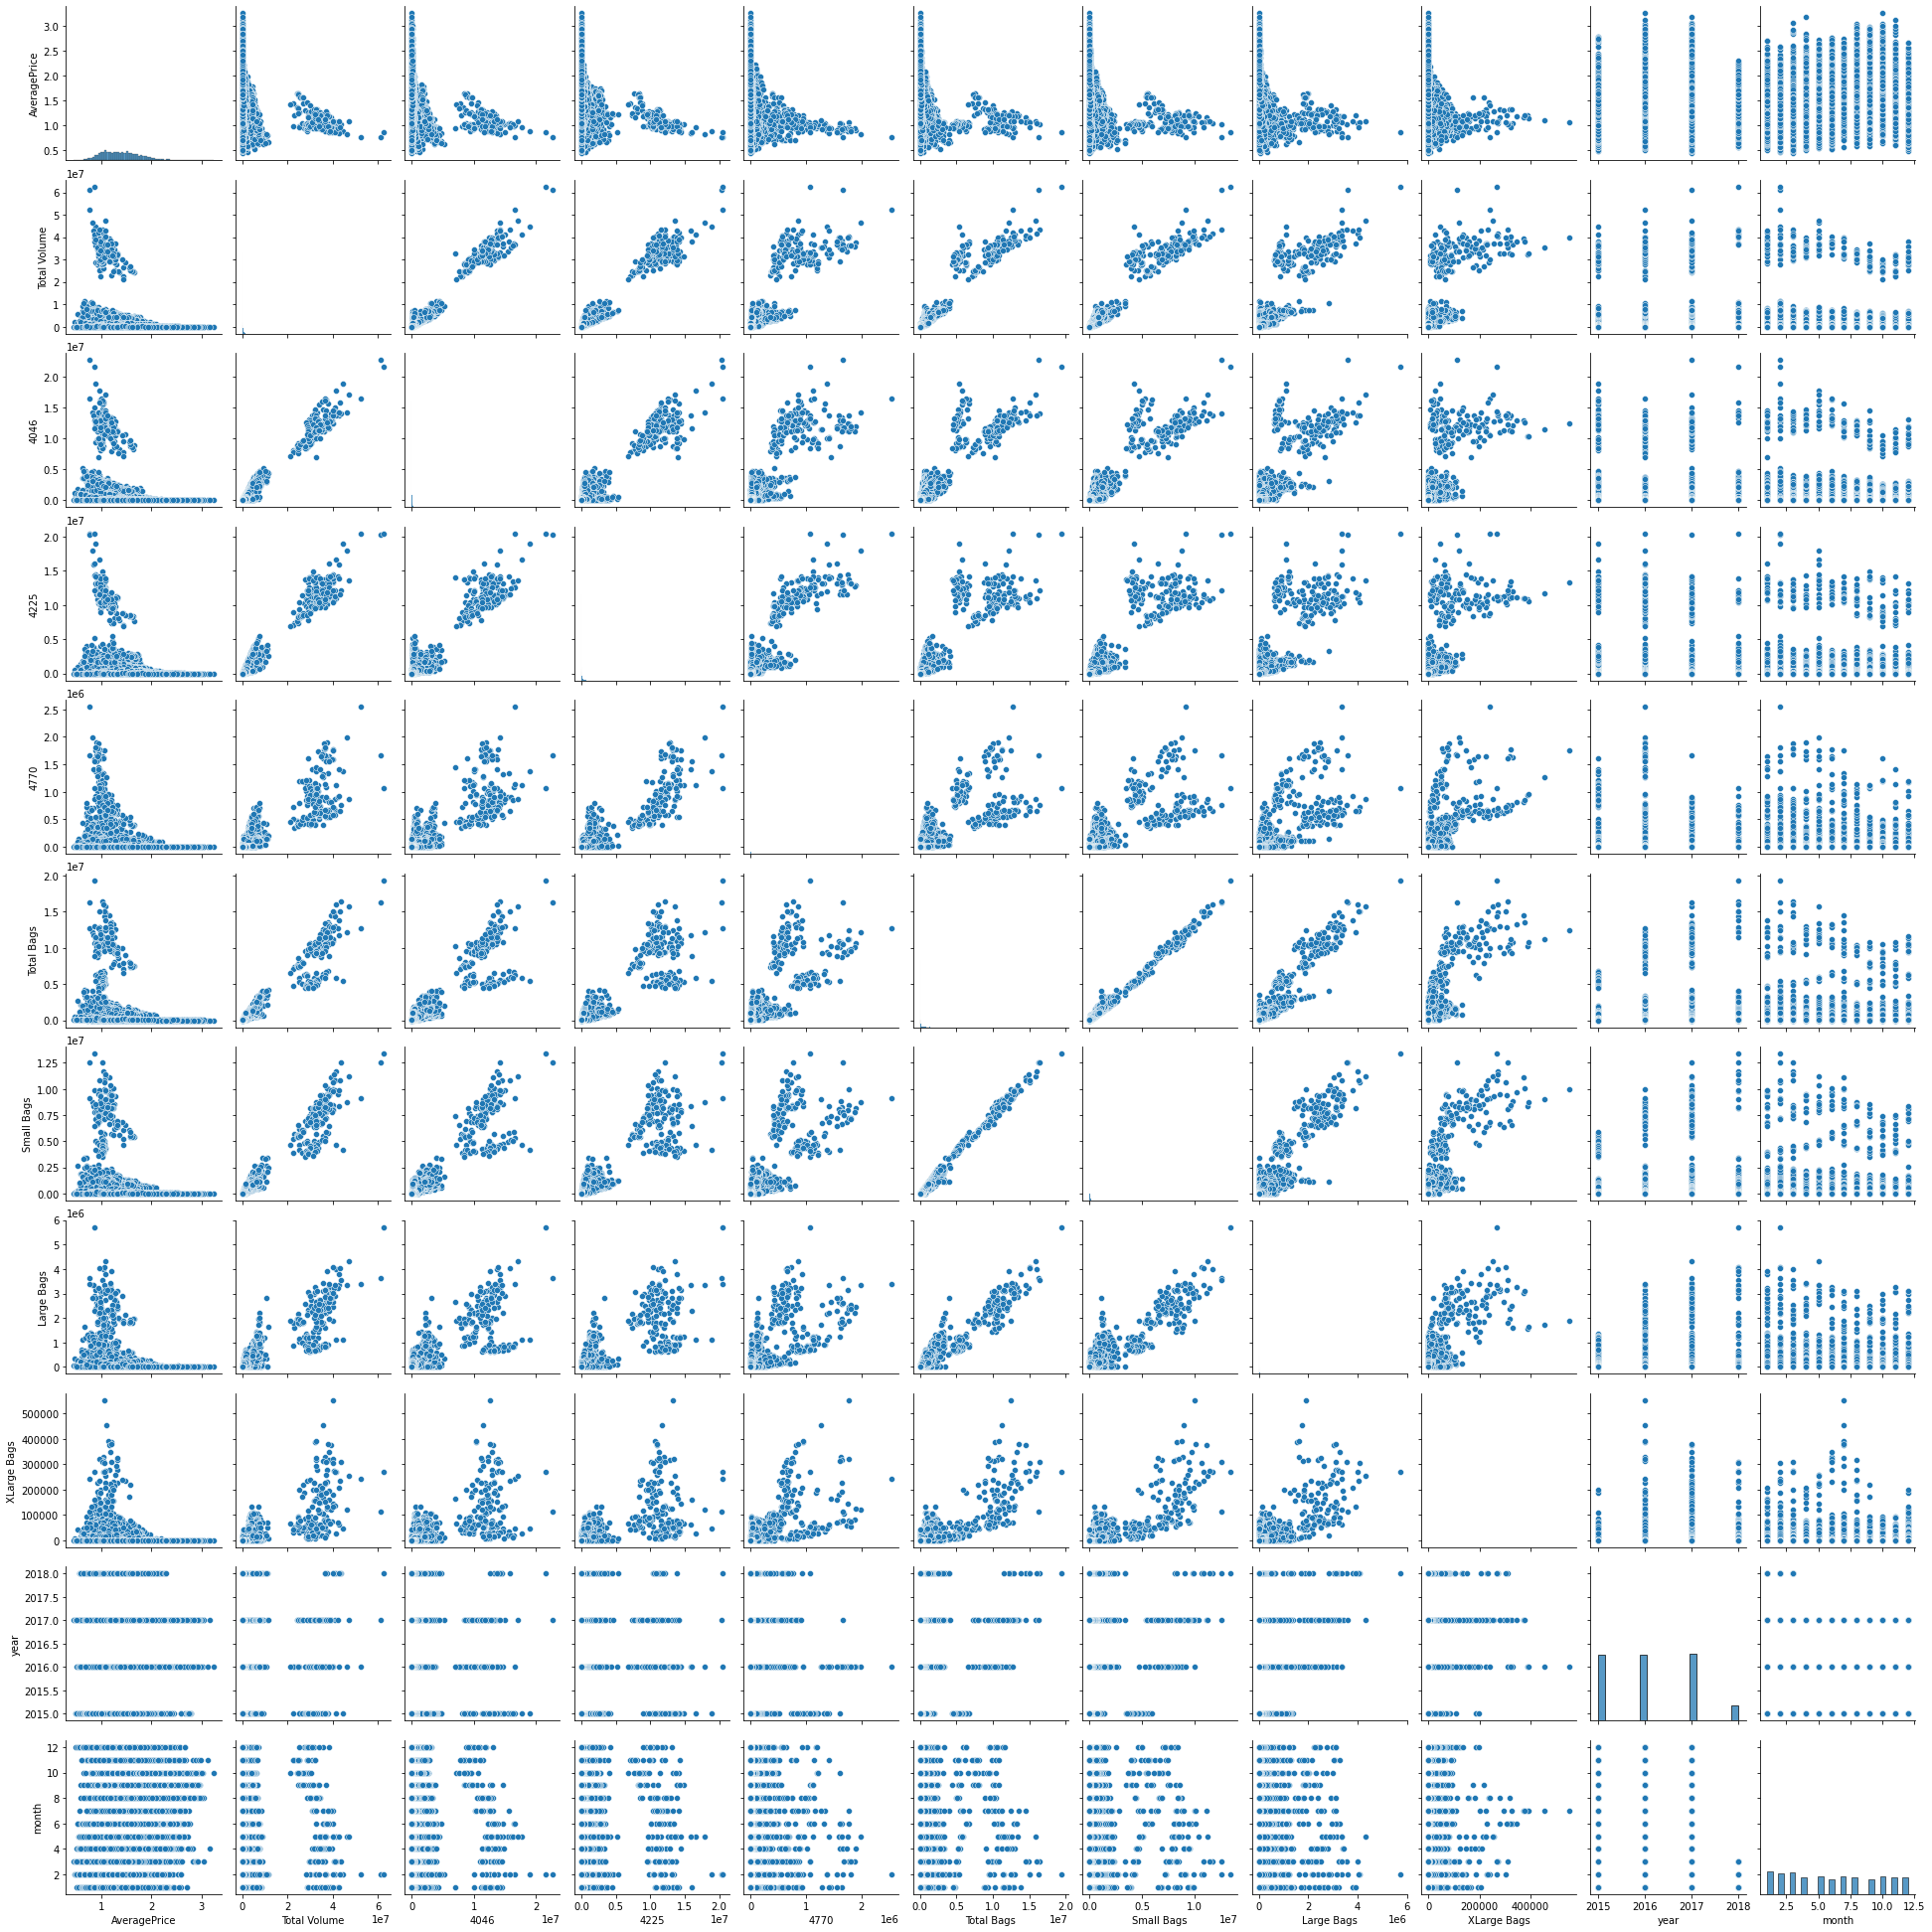

In [21]:
sns.pairplot(df)

### Observation - 
- Lots of features are highly correlated

## 2. Count Plot

conventional    9126
organic         9123
Name: type, dtype: int64


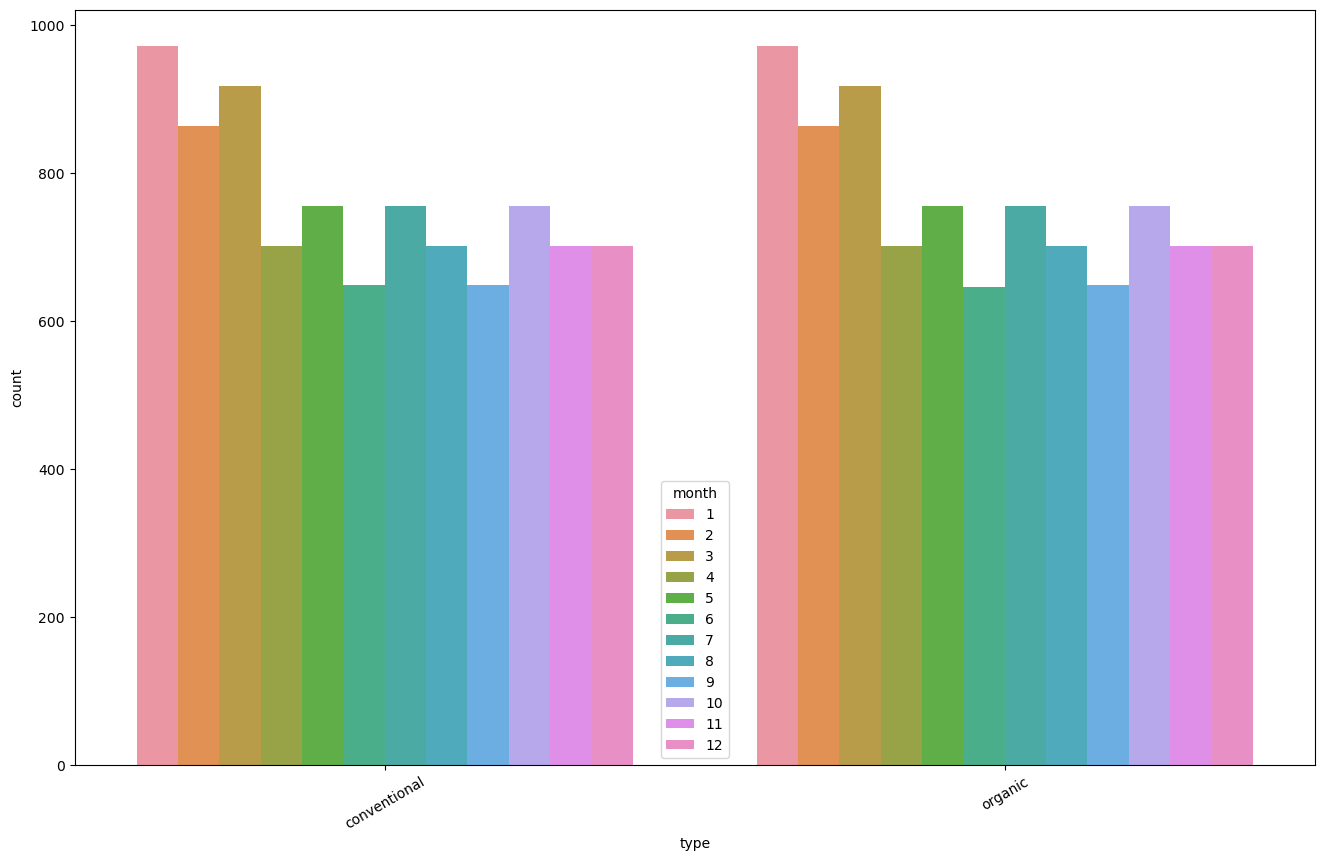

In [22]:
# Countplot for type
plt.figure(dpi=100, figsize=(16, 10))
plot = sns.countplot('type',data=df, hue='month')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.type.value_counts())

### Observation - 
- Dataset is balanced for Conventional and Organic with count as 9126 and 9123 respectively
- There are 9126 values in conventionl avacado
- There are 9123 values in organic avacado
- In First three month of year, Sell of avacados is higher

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


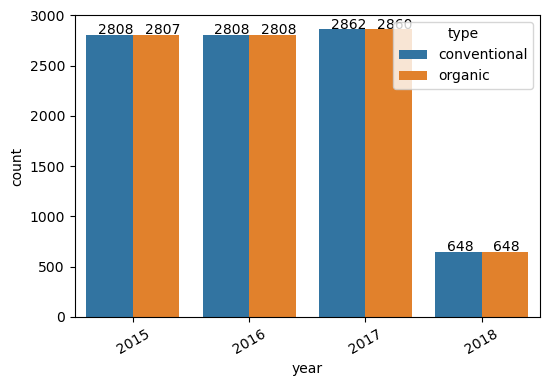

In [23]:
# Countplot for 
plt.figure(dpi=100)
plot = sns.countplot('year',data=df, hue='type')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.year.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
- Dataset is balanced for year 2015, 2016, 2017 and 2018
- Count for Organic and Conventional is same for all years

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

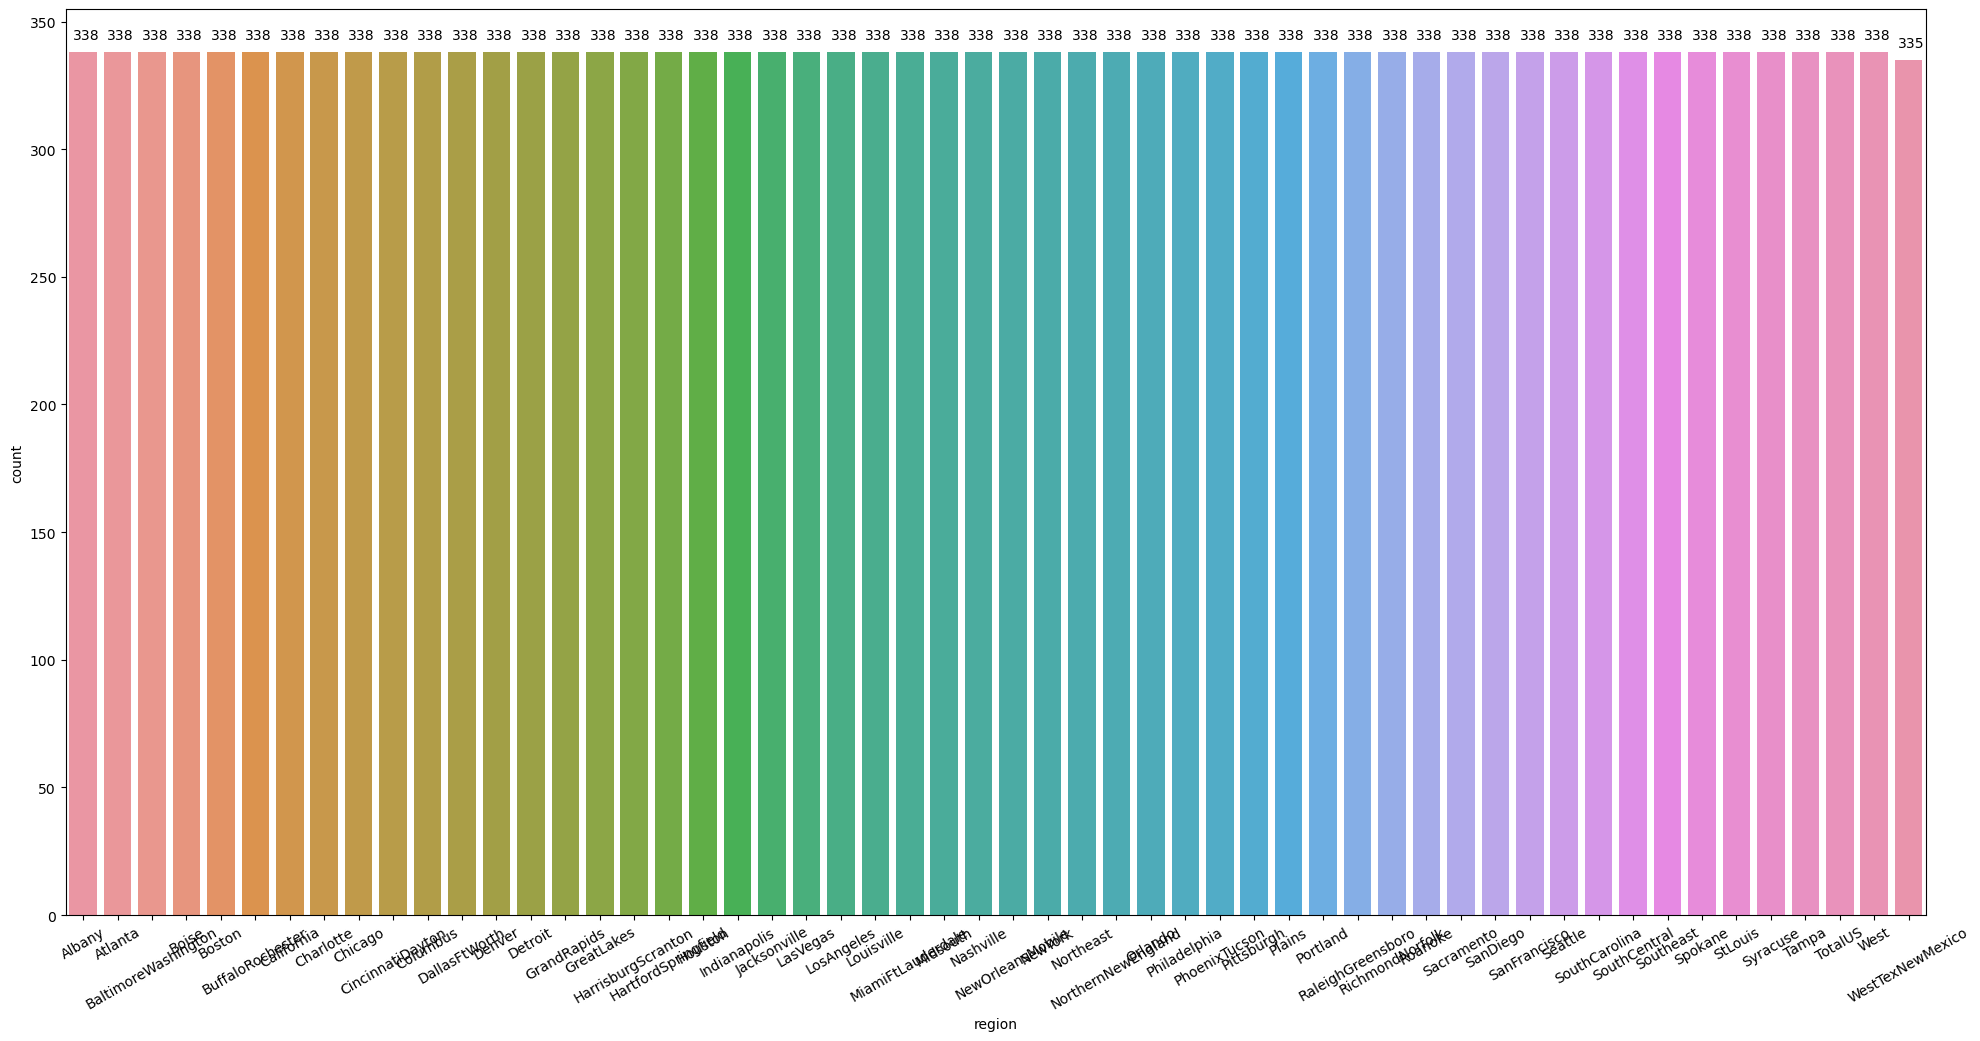

In [24]:
# Countplot for 
plt.figure(figsize=(24, 12), dpi=100)
plot = sns.countplot('region',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.region.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
- Dataset is balanced for year All regions.
- All regions has equal number of records, except WestTextNewMexico

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

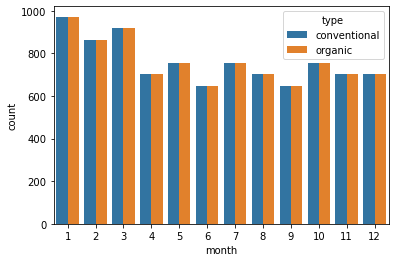

In [99]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df, hue='type')

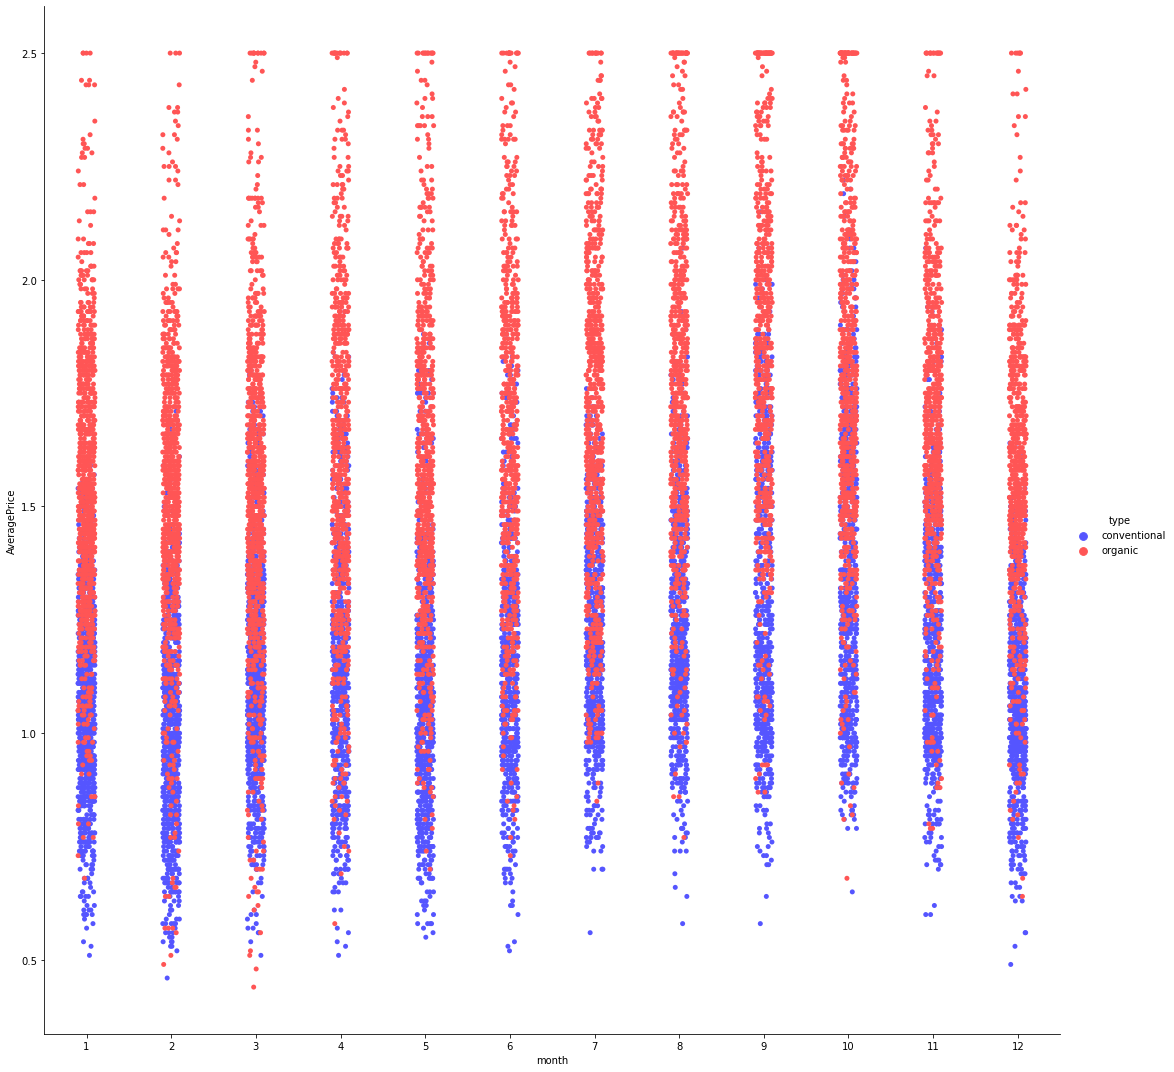

In [105]:
sns.catplot(x="month", y="AveragePrice", hue="type", data=df, palette="seismic", height=15)
plt.show()

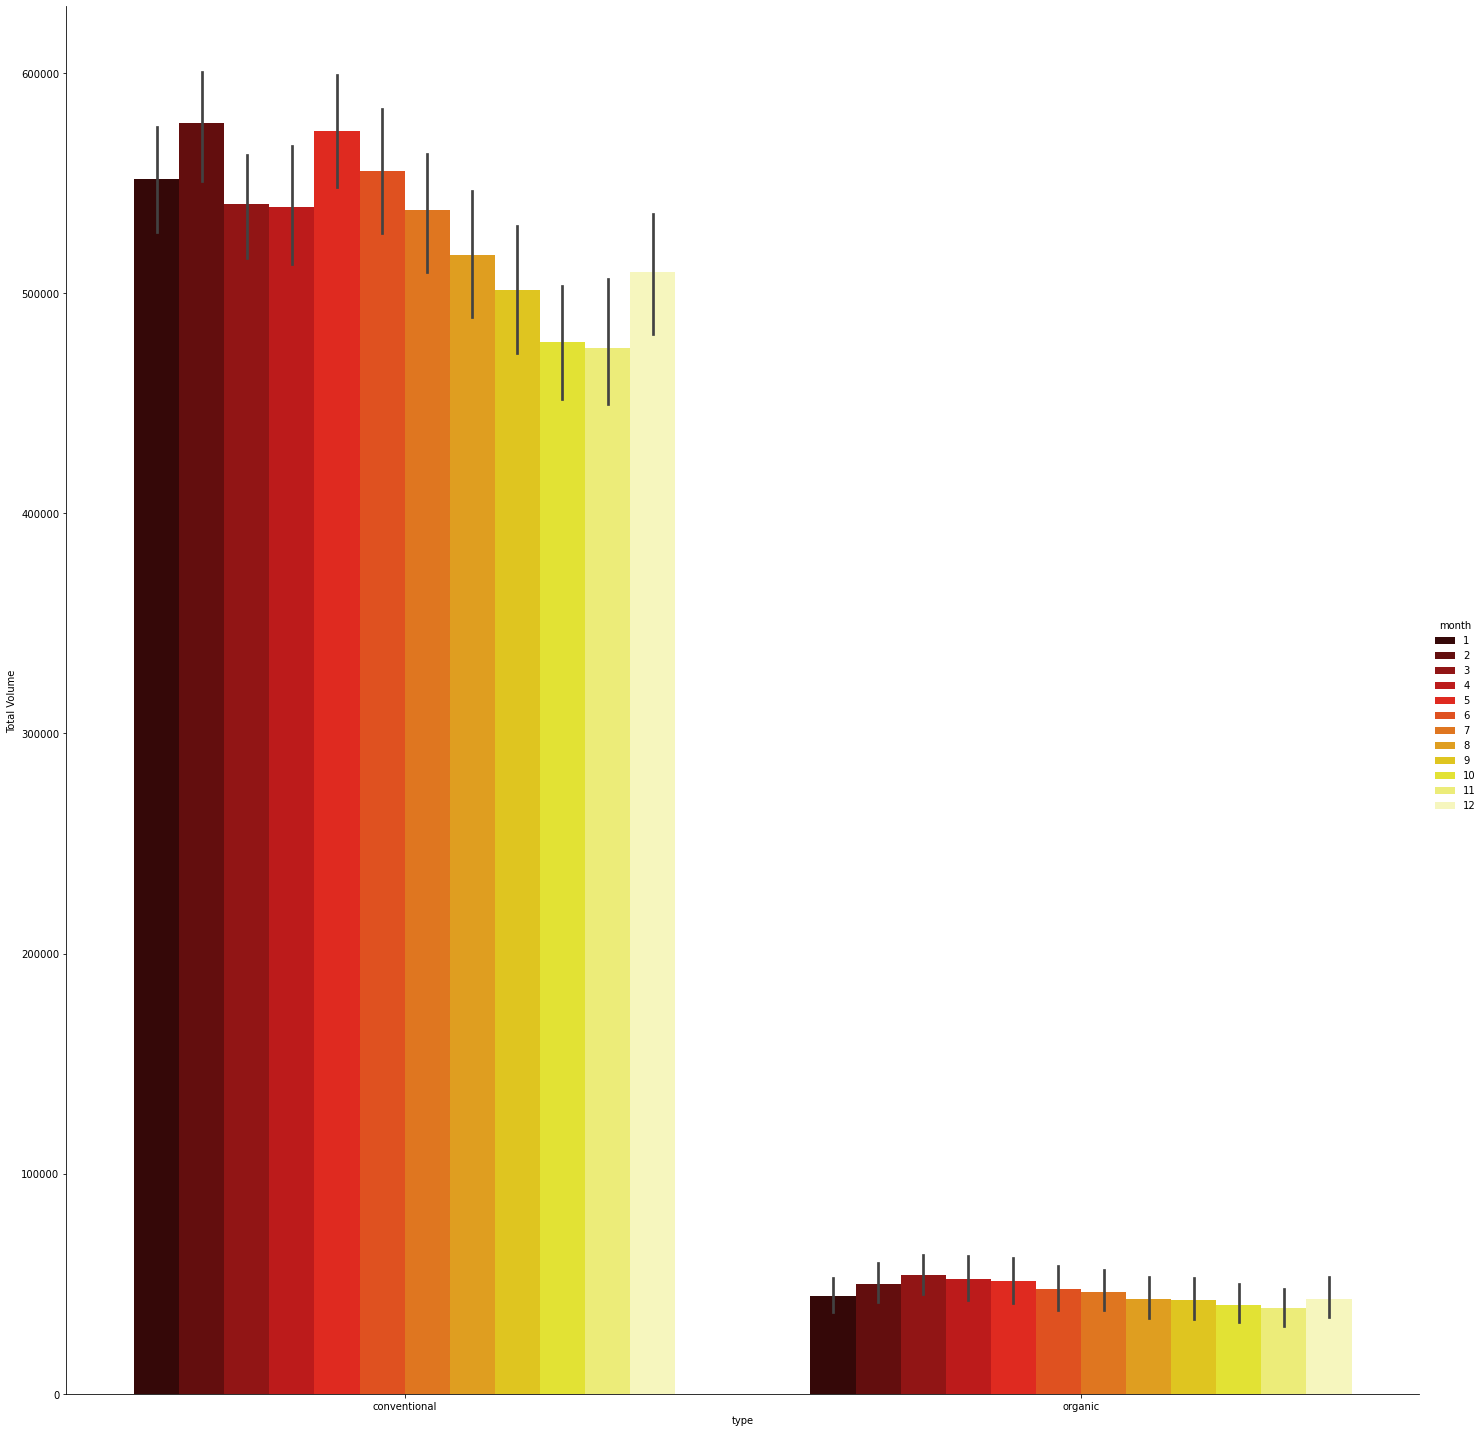

In [109]:
sns.catplot(x="type", y="Total Volume", hue="month", kind="bar", data=df, palette="hot", height=20)
plt.show()

### Observation - 
1. Average of Avacado consumption (conventional) is more as compared to organic Avacado

<Figure size 1080x720 with 0 Axes>

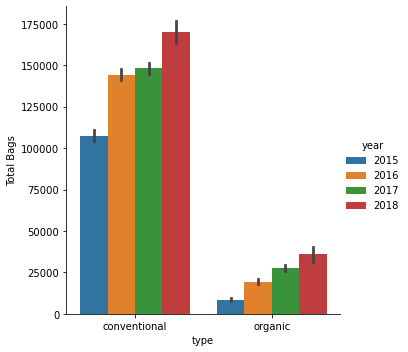

In [114]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="year", data=df, kind="bar")
plt.show()

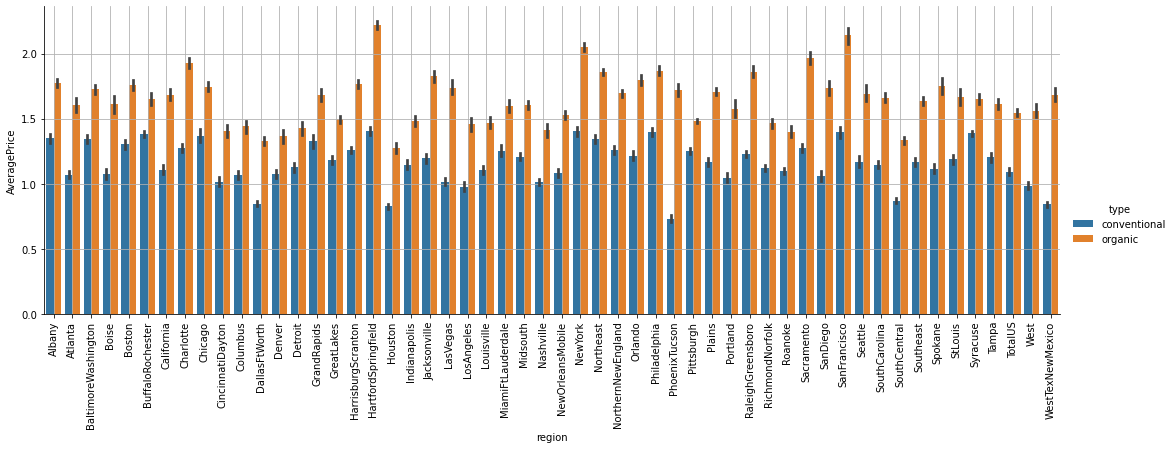

In [116]:
price_region =sns.catplot(x="region",y="AveragePrice",data=df,kind="bar",hue="type",aspect=3)
price_region.set_xticklabels(rotation=90)
plt.grid();

ValueError: Could not interpret input 'AP_mean'

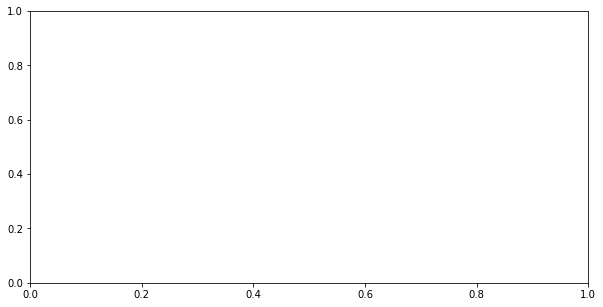

In [118]:
#plot region and mean of average price
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.swarmplot(x = "region", y="AP_mean", data = df, size= 5)
plt.xticks(rotation=90)
plt.title("Region Vs Price", fontsize=24)

### Observation - 
- From the above bar plot, we can see that there is price difference avacados based on region
- Price in sanfransisko and HarrisburgScranton is highest
- Price in PhoenixTucson and Houston is very less

## Density Plot

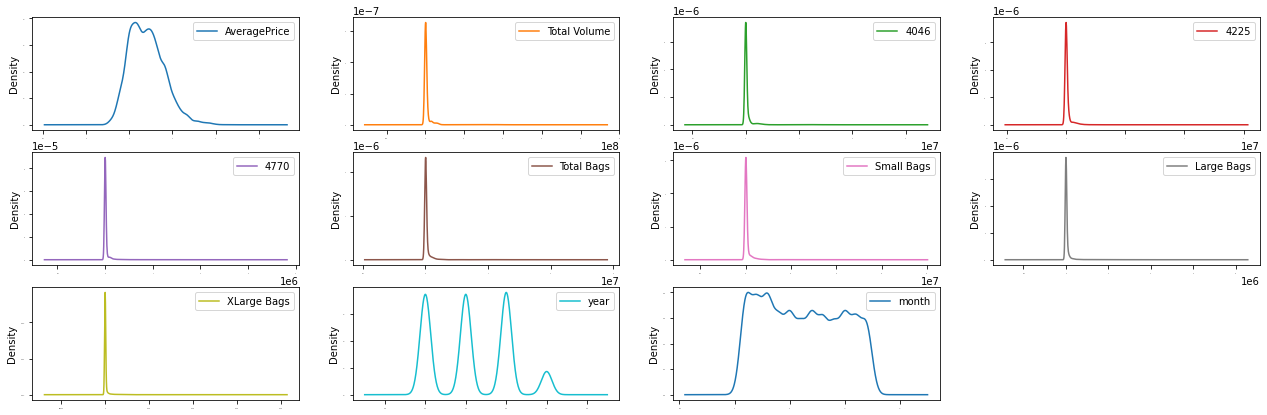

In [25]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

### Observation - 
- Average price is somewhat normally distributed
- All other models has high variance
    - Large number of outliers present
    - Year density plot show Multi-modal analysis
- All skewness, outliers can be treated before model building

## Checking Outliers

AveragePrice       AxesSubplot(0.125,0.749828;0.168478x0.130172)
Total Volume    AxesSubplot(0.327174,0.749828;0.168478x0.130172)
4046            AxesSubplot(0.529348,0.749828;0.168478x0.130172)
4225            AxesSubplot(0.731522,0.749828;0.168478x0.130172)
4770               AxesSubplot(0.125,0.593621;0.168478x0.130172)
Total Bags      AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Small Bags      AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Large Bags      AxesSubplot(0.731522,0.593621;0.168478x0.130172)
XLarge Bags        AxesSubplot(0.125,0.437414;0.168478x0.130172)
year            AxesSubplot(0.327174,0.437414;0.168478x0.130172)
month           AxesSubplot(0.529348,0.437414;0.168478x0.130172)
dtype: object

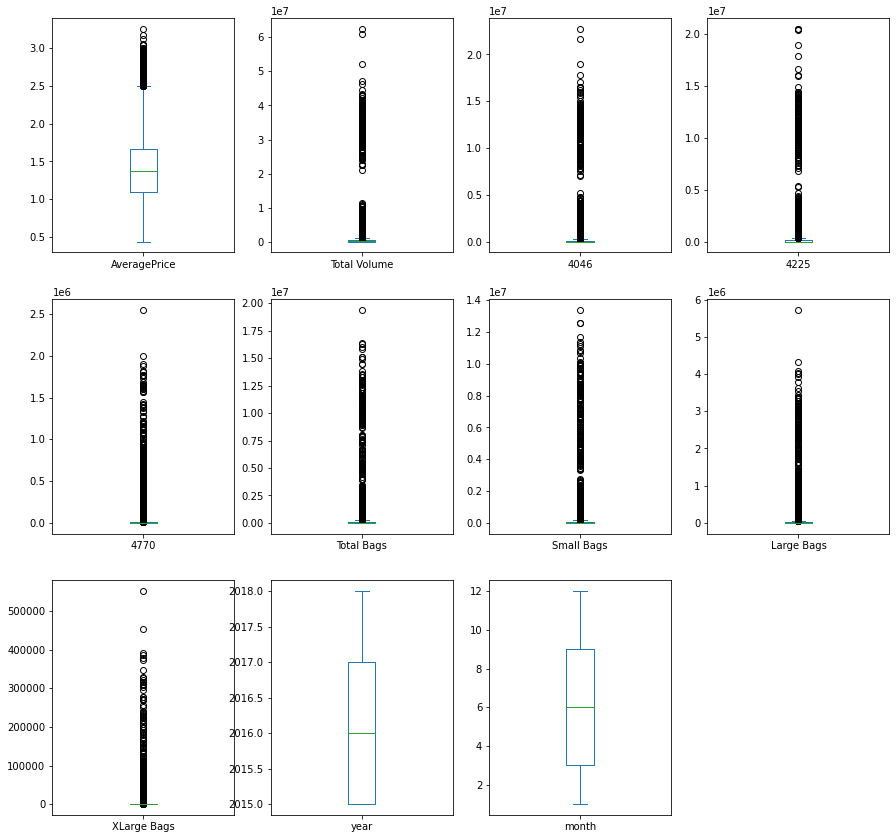

In [26]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,25))

### Observation - 
Outliers Present in 
- AveragePrice - 
- Total Volume - 
- 4046 - 
- 4225 - 
- 4770 - 
- Total Bags - 
- Small Bags - 
- Large Bags - 
- XLarge Bag - 

In [27]:
outlier_features = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

### Removing outliers by IQR method

In [28]:
for feature in outlier_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

AveragePrice       AxesSubplot(0.125,0.749828;0.168478x0.130172)
Total Volume    AxesSubplot(0.327174,0.749828;0.168478x0.130172)
4046            AxesSubplot(0.529348,0.749828;0.168478x0.130172)
4225            AxesSubplot(0.731522,0.749828;0.168478x0.130172)
4770               AxesSubplot(0.125,0.593621;0.168478x0.130172)
Total Bags      AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Small Bags      AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Large Bags      AxesSubplot(0.731522,0.593621;0.168478x0.130172)
XLarge Bags        AxesSubplot(0.125,0.437414;0.168478x0.130172)
year            AxesSubplot(0.327174,0.437414;0.168478x0.130172)
month           AxesSubplot(0.529348,0.437414;0.168478x0.130172)
dtype: object

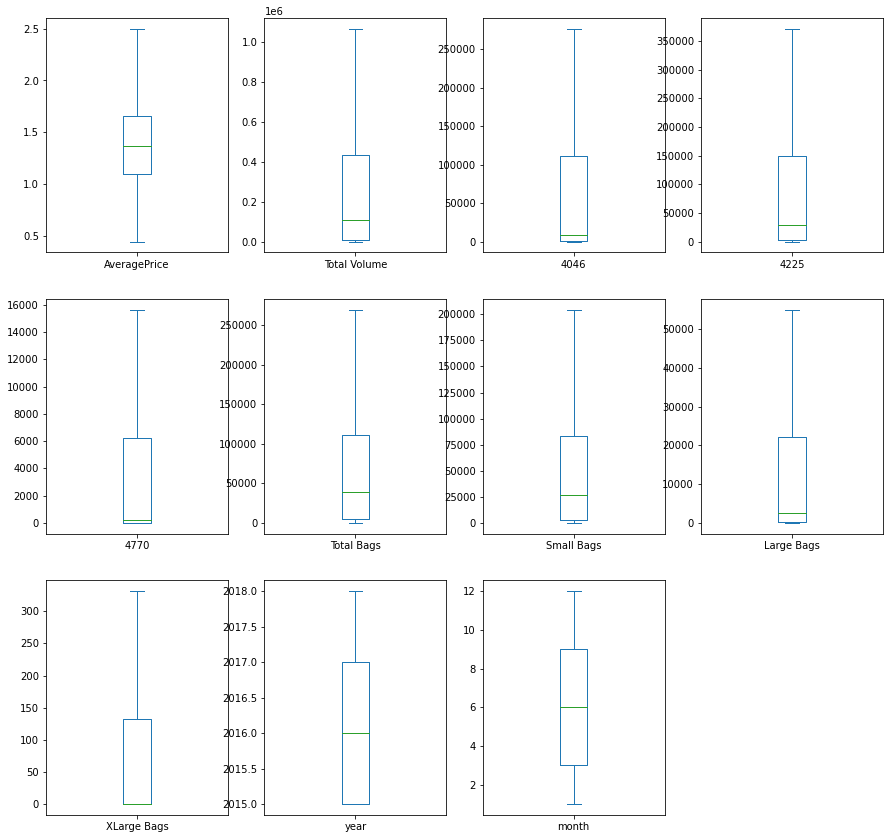

In [29]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,25))

In [30]:
df.shape

(18249, 13)

### Observation - 
- From above figure, it is clear that there are no outliers in data. Numerical data is ready for model building
- After VIF and StandardScaler and Correlation plor, data can be modeled

<AxesSubplot:>

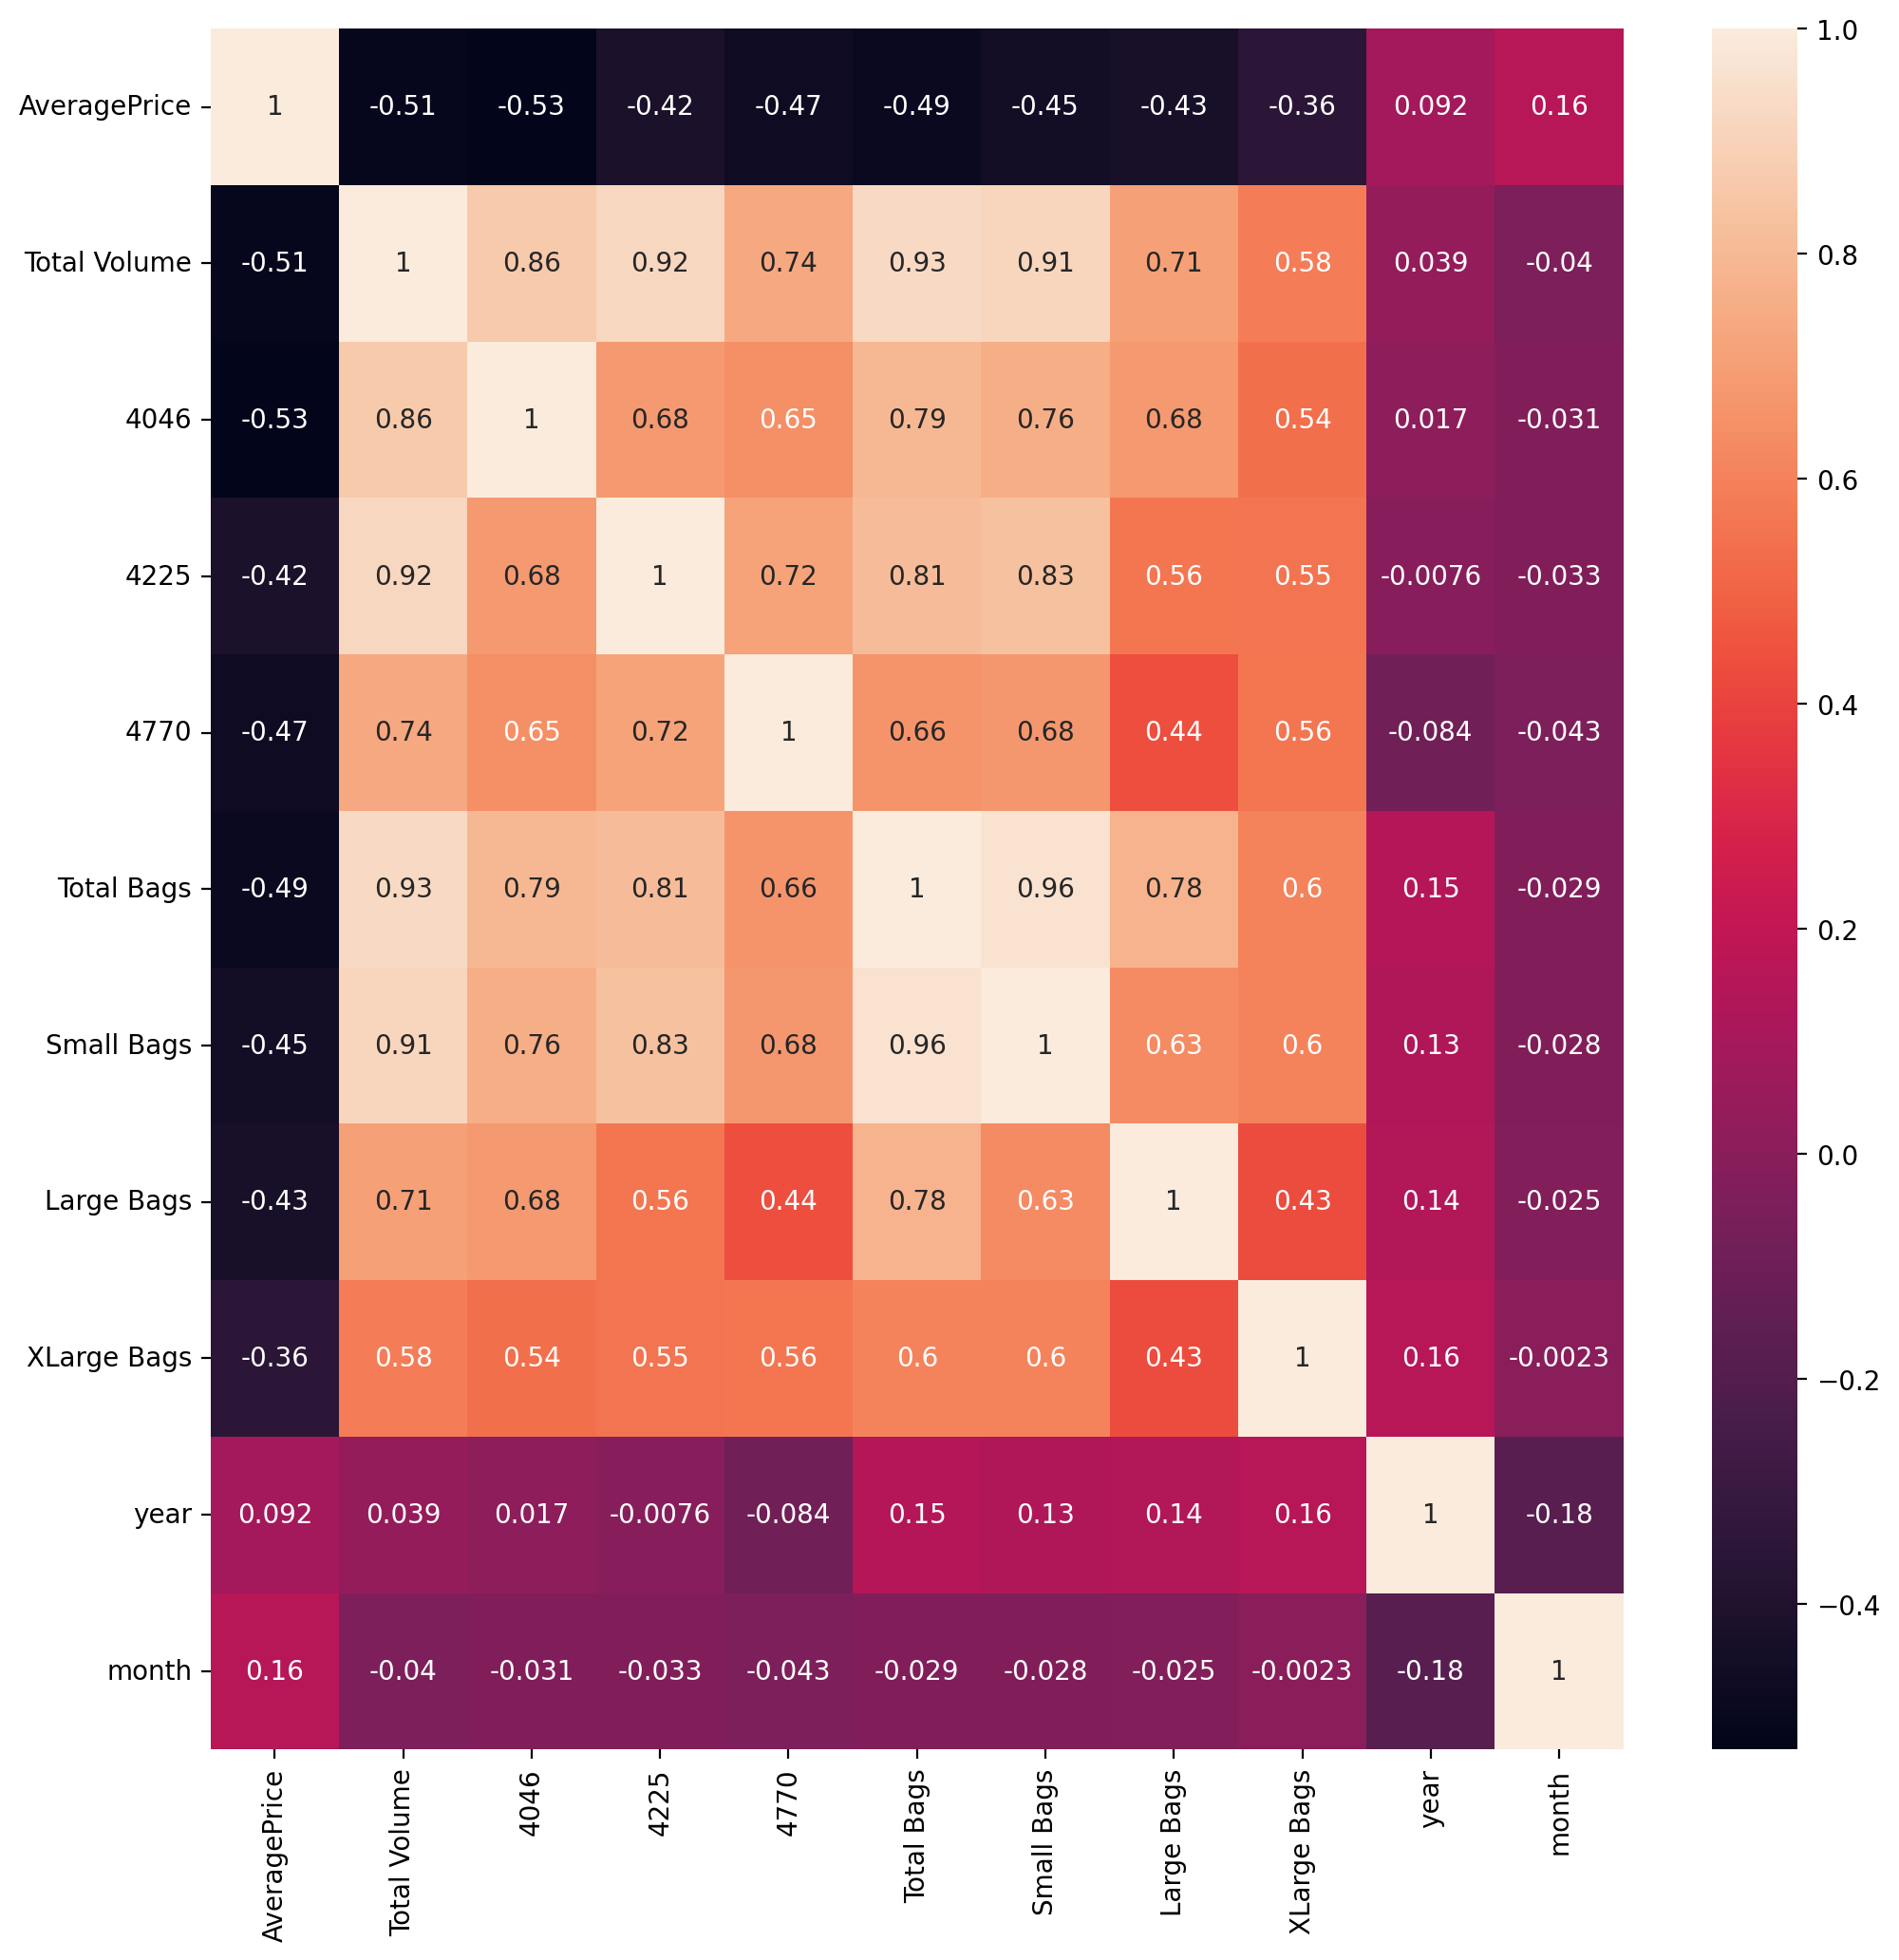

In [31]:
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(df.corr(), annot=True)

### Observation - 
- There are many features which are directly/indirectly proportional
- has high correlation value 
- To avoid multi-collinearity, we need to drop columns which are serving same effect on target variable

<AxesSubplot:>

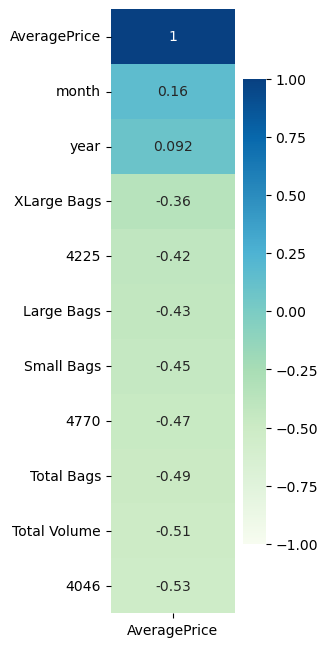

In [32]:
plt.figure(figsize=(2,8), dpi=100)
sns.heatmap(df.corr()[['AveragePrice']].sort_values(by='AveragePrice',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='GnBu')

# ====================Average Price Prediction ====================

# ------------------------------ Feature Engineering ----------------------------------------

In [33]:
df2 = df.copy()

In [34]:
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [35]:
label_=LabelEncoder()
#Bad becomes 0,and good becomes 1
df2['type']=label_.fit_transform(df2['type'])
df2['region']=label_.fit_transform(df2['region'])
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


In [36]:
y1 = df2['AveragePrice']
y1

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [37]:
x1 = df2.drop('AveragePrice', axis=1)
x1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1



## Using VIF, to reduce multi Collinearity

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [40]:
x1.dtypes

Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
month             int64
dtype: object

In [41]:
calc_vif(x1)

,variables,VIF FACTOR
0,Total Volume,63.988455
1,4046,10.605893
2,4225,18.994377
3,4770,3.594490
4,Total Bags,67.664045
5,Small Bags,41.916584
6,Large Bags,7.031898
7,XLarge Bags,2.556903
8,type,4.383601
9,year,12.724946


### Observation -
It is observed that, Total Bags is having high VIF Factor = 67.66 So dropping this column.

In [42]:
x1.drop('Total Bags',axis=1 ,inplace=True)
calc_vif(x1)

,variables,VIF FACTOR
0,Total Volume,56.511834
1,4046,10.088978
2,4225,17.460081
3,4770,3.592673
4,Small Bags,11.207279
5,Large Bags,3.467677
6,XLarge Bags,2.541287
7,type,4.376516
8,year,12.689480
9,region,4.172929


### Observation -
It is observed that, Total Volume is having high VIF Factor = 56.51 So dropping this column.

In [43]:
x1.drop('Total Volume',axis=1 ,inplace=True)
calc_vif(x1)

,variables,VIF FACTOR
0,4046,4.861647
1,4225,5.927671
2,4770,3.563671
3,Small Bags,7.456843
4,Large Bags,3.026818
5,XLarge Bags,2.506212
6,type,4.317197
7,year,12.596456
8,region,4.146389
9,month,4.069711


### Data is ready for Model Building, Checking Skewness and Data Distribution

In [44]:
x1.skew()

4046           1.251184
4225           1.219271
4770           1.212184
Small Bags     1.186103
Large Bags     1.215301
XLarge Bags    1.175351
type           0.000329
year           0.215339
region         0.000030
month          0.106617
dtype: float64

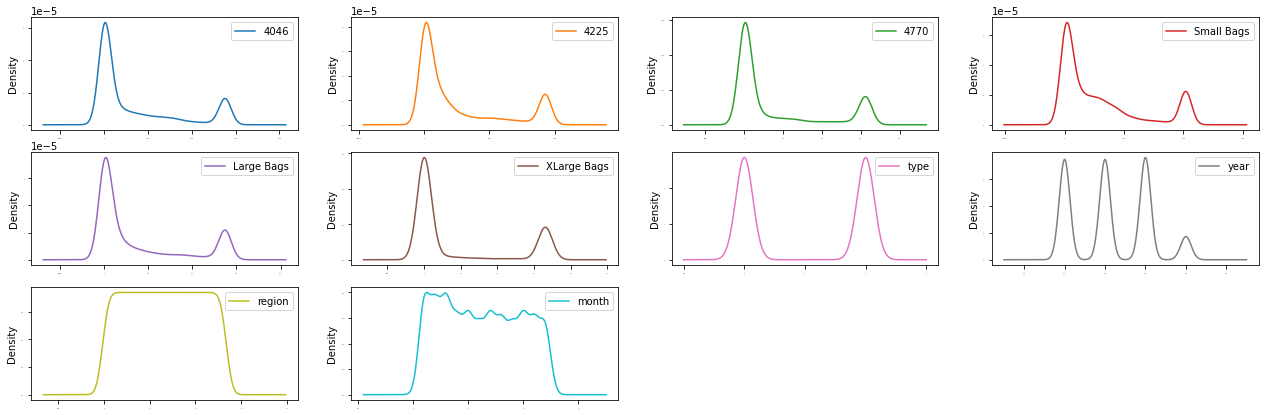

In [45]:
x1.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

### Observation - 
- Data is now normally distributed with Bi-variate analysis

<AxesSubplot:>

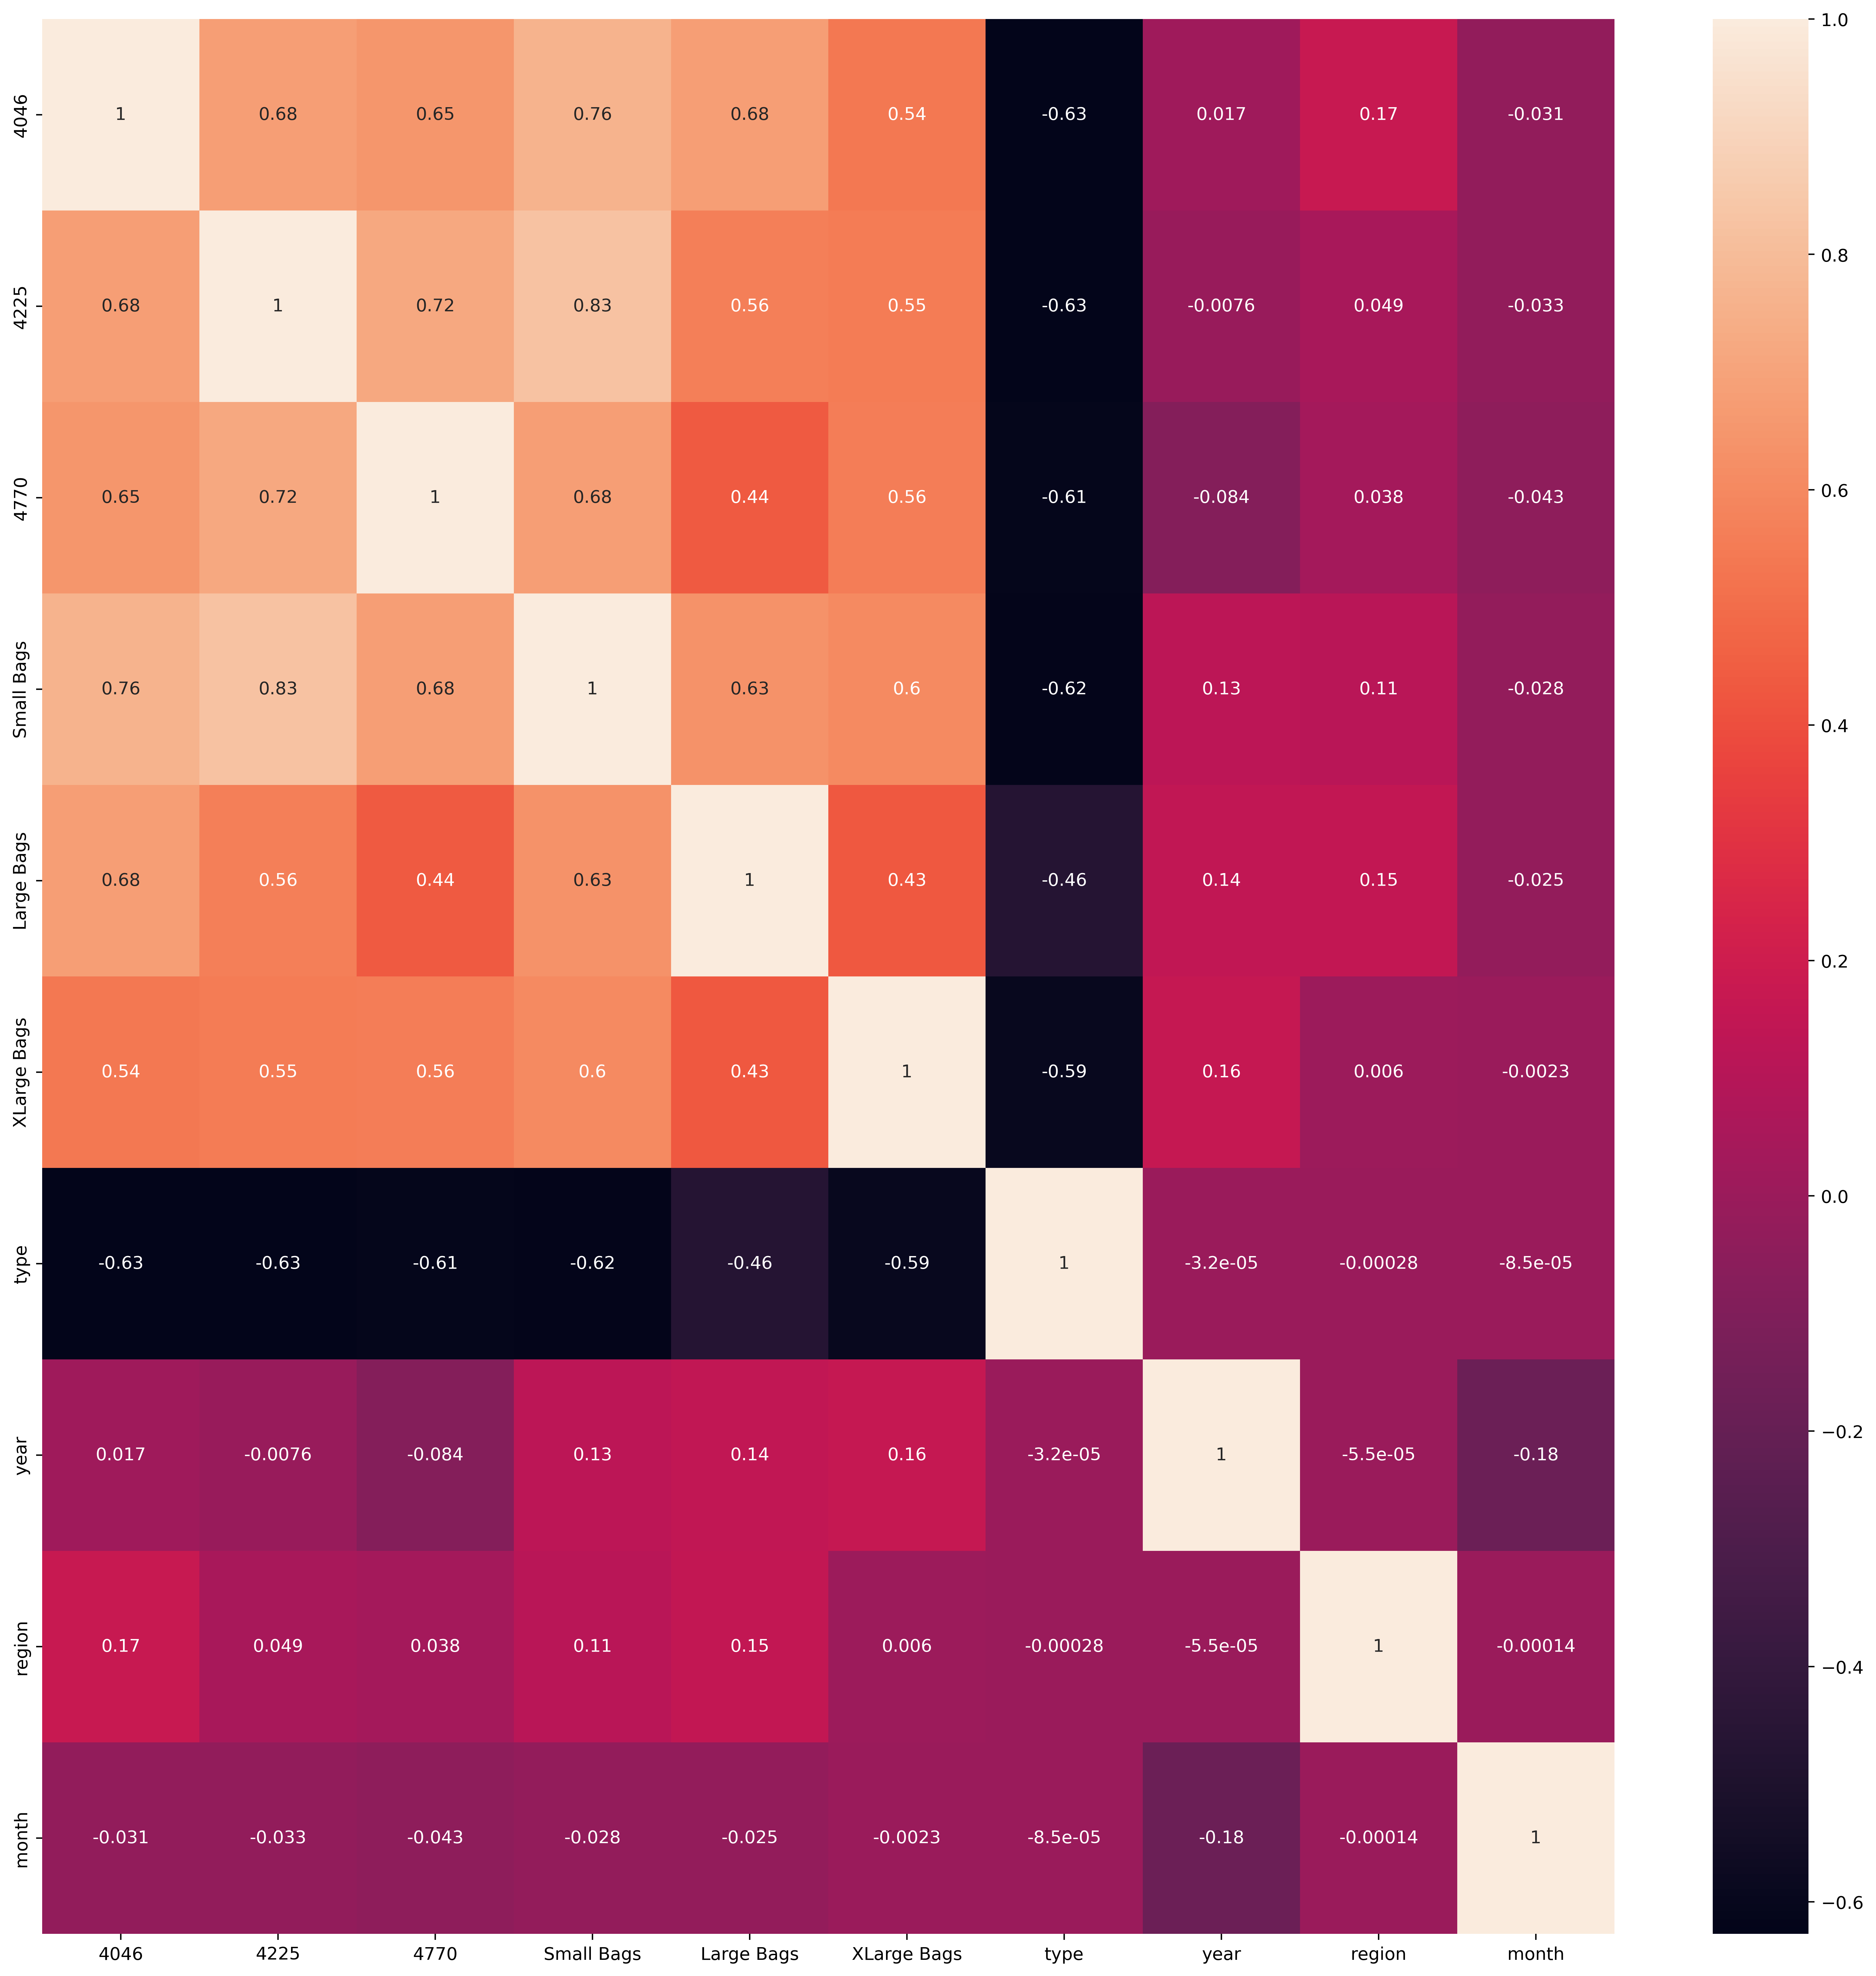

In [46]:
plt.figure(figsize=(20,20), dpi=400)
sns.heatmap(x1.corr(), annot=True)

# Importing ML Models

In [47]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [48]:
x1.dtypes

4046           float64
4225           float64
4770           float64
Small Bags     float64
Large Bags     float64
XLarge Bags    float64
type             int32
year             int64
region           int32
month            int64
dtype: object

In [49]:
y1.dtype

dtype('float64')

In [50]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,100):
        
        # Splitting the data Set
        X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.33, random_state=i, shuffle=True)
        
        # Added for Scaling
        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        X_test=sc.fit_transform(X_test)
        
        # Model Preparation
        md=model()
        md.fit(X_train,y_train)
        
        # Prediction and Testing Model
        predict=md.predict(X_test)
        

        
        r2score=r2_score(y_test,predict)
        rmse = mean_squared_error(y_test, predict, squared=False)
        # cv_score = (cross_val_score(md, x, y, cv=2).mean())*100
        
        
        if r2score>max_score:
            max_score=r2score
            max_state=i
            
            
    # ----------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=predict, color='g')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(md, fontsize=18)
    plt.show()
    
    
    # -----------------------------------------------------------        
    print(f'----------------------------{model}----------------------------')        
    print("1. Maximum score of {} 2. Random_state {} 3. RMSE = {}".format(max_score,max_state, rmse))

------------------------------------"" Linear Regression""------------------------------------ 


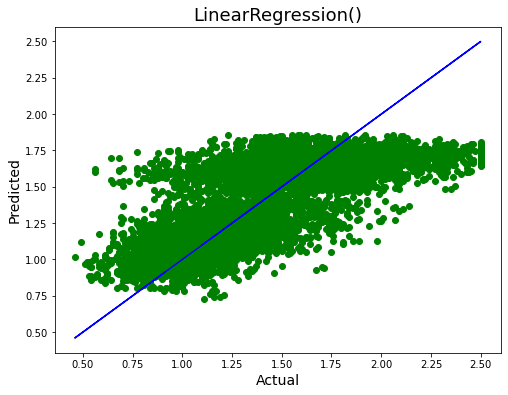

----------------------------<class 'sklearn.linear_model._base.LinearRegression'>----------------------------
1. Maximum score of 0.5005695299361126 2. Random_state 94 3. RMSE = 0.28621973159950315


In [51]:
print(f'------------------------------------"\033[1m" Linear Regression"\033[0m"------------------------------------ ')
model_select(LinearRegression)

------------------------------------""Ridge Regression""------------------------------------


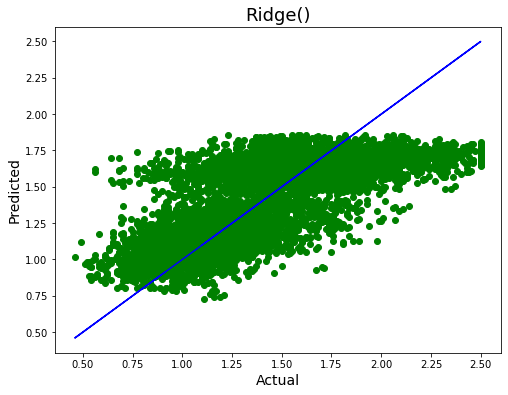

----------------------------<class 'sklearn.linear_model._ridge.Ridge'>----------------------------
1. Maximum score of 0.500564974694137 2. Random_state 94 3. RMSE = 0.2862194196669944


In [52]:
print(f'------------------------------------"\033[1m"Ridge Regression"\033[0m"------------------------------------')
model_select(Ridge)

------------------------------------""Decision Tree Regressor""------------------------------------


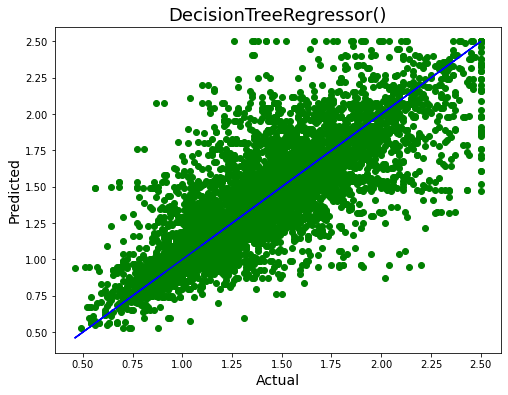

----------------------------<class 'sklearn.tree._classes.DecisionTreeRegressor'>----------------------------
1. Maximum score of 0.7208546480644356 2. Random_state 91 3. RMSE = 0.24922879868123468


In [53]:
print(f'------------------------------------"\033[1m"Decision Tree Regressor"\033[0m"------------------------------------')
model_select(DecisionTreeRegressor)

------------------------------------""KNeighbors Regressor""------------------------------------


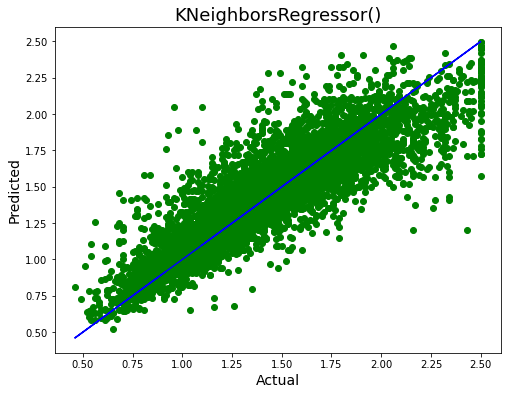

----------------------------<class 'sklearn.neighbors._regression.KNeighborsRegressor'>----------------------------
1. Maximum score of 0.7947403174435448 2. Random_state 94 3. RMSE = 0.19039970714479448


In [54]:
print(f'------------------------------------"\033[1m"KNeighbors Regressor"\033[0m"------------------------------------')
model_select(KNeighborsRegressor)

------------------------------------""SGD Regressor""------------------------------------


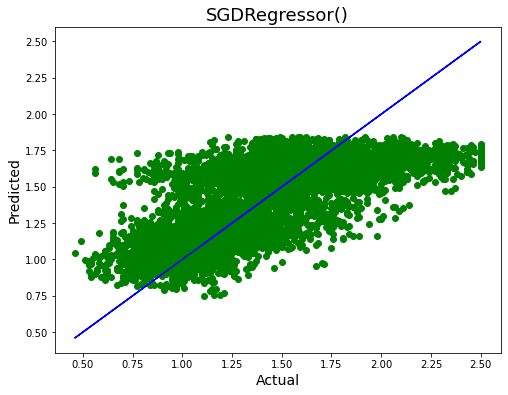

----------------------------<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>----------------------------
1. Maximum score of 0.498751155837846 2. Random_state 94 3. RMSE = 0.28651232975756463


In [55]:
print(f'------------------------------------"\033[1m"SGD Regressor"\033[0m"------------------------------------')
model_select(SGDRegressor)

# Hyper Parameter Tuning for KNeighbourRegressor

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y11 = label_encoder.fit_transform(y1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x1,y11, test_size=0.33, random_state=94, shuffle=True)

In [59]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [60]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]

In [61]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=KNeighborsRegressor(), 
                      param_grid=hp_candidates, 
                      cv=cv_method,
                      verbose=1,  
                      scoring='accuracy', 
                      return_train_score=True)

In [62]:
grid.fit(X_train,y_train)

Fitting 15 folds for each of 84 candidates, totalling 1260 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2, 5], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [91]:
# Save File
import pickle
file = 'Average_Price_of_Avacado'
#save file
save = pickle.dump(grid,open(file,'wb'))

# ====================Region Prediction ====================

In [63]:
df2 = df.copy()
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [64]:
label_=LabelEncoder()
#Bad becomes 0,and good becomes 1
df2['type']=label_.fit_transform(df2['type'])
df2['region']=label_.fit_transform(df2['region'])
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


In [65]:
y2 = df2['region']
y2

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [66]:
x2 = df2.drop('region', axis=1)
x2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [69]:
calc_vif(x2)

,variables,VIF FACTOR
0,AveragePrice,25.716192
1,Total Volume,64.136214
2,4046,10.408511
3,4225,19.278394
4,4770,3.639413
5,Total Bags,67.645140
6,Small Bags,41.769063
7,Large Bags,6.962774
8,XLarge Bags,2.568329
9,type,5.387149


In [70]:
x2.drop('Total Bags', axis=1, inplace=True)
calc_vif(x2)

,variables,VIF FACTOR
0,AveragePrice,25.633967
1,Total Volume,56.696491
2,4046,9.842191
3,4225,17.810572
4,4770,3.638386
5,Small Bags,11.150279
6,Large Bags,3.468265
7,XLarge Bags,2.549120
8,type,5.385675
9,year,26.302911


In [71]:
x2.drop('Total Volume', axis=1, inplace=True)
calc_vif(x2)

,variables,VIF FACTOR
0,AveragePrice,25.387976
1,4046,4.843990
2,4225,5.978257
3,4770,3.615554
4,Small Bags,7.435317
5,Large Bags,3.065302
6,XLarge Bags,2.521678
7,type,5.278726
8,year,26.302058
9,month,4.246045


In [72]:
x2.drop('year', axis=1, inplace=True)
calc_vif(x2)

,variables,VIF FACTOR
0,AveragePrice,10.199126
1,4046,4.668372
2,4225,5.977671
3,4770,3.483350
4,Small Bags,7.419543
5,Large Bags,3.000275
6,XLarge Bags,2.512934
7,type,5.244185
8,month,4.083145


In [73]:
x2.drop('AveragePrice', axis=1, inplace=True)
calc_vif(x2)

,variables,VIF FACTOR
0,4046,4.665754
1,4225,5.821614
2,4770,3.477192
3,Small Bags,7.398795
4,Large Bags,2.998711
5,XLarge Bags,2.387814
6,type,1.994376
7,month,2.747913


### Observation - 
- Based on VIF factor, we have decided to drop below columns having high 

# Model Building

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=43)

In [82]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [83]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

In [85]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7249315068493151
Cross-val-score= 0.7176509994648239


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8339726027397261
Cross-val-score= 0.8290297820800511


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.630958904109589
Cross-val-score= 0.6166858516341649


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.06575342465753424
Cross-val-score= 0.05781253814303285


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.21123287671232877
Cross-val-score= 0.22193395739247185




In [86]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [87]:
clf_rf.best_score_

0.8331396997380454

In [88]:
clf_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [89]:
clf_rf_df = pd.DataFrame(clf_rf.cv_results_)
clf_rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.338341,0.650827,0.113601,0.005700,auto,500,"{'max_features': 'auto', 'n_estimators': 500}",0.828082,0.829452,0.841781,0.814384,0.843836,0.828082,0.826712,0.836301,0.836301,0.838931,0.832386,0.008335,2
1,3.202197,0.066911,0.113809,0.008134,sqrt,500,"{'max_features': 'sqrt', 'n_estimators': 500}",0.831507,0.830822,0.838356,0.816438,0.842466,0.828082,0.826712,0.838356,0.839041,0.839616,0.833140,0.007563,1
2,2.954037,0.125969,0.118322,0.007852,log2,500,"{'max_features': 'log2', 'n_estimators': 500}",0.820548,0.823973,0.829452,0.811644,0.839726,0.818493,0.818493,0.824658,0.835616,0.830021,0.825262,0.008111,3


In [90]:
pred=clf_rf.predict(x_test)
print(round(accuracy_score(pred,y_test), 3) * 100, '%')   # actual accuarcy on our test set.

83.6 %


In [93]:
# Save File
import pickle
file = 'Region_of_Avacado'
#save file
save = pickle.dump(pred,open(file,'wb'))